In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

## model

In [12]:
import keras
from keras.models import Model, Sequential
from keras.layers import Dense, Input, Lambda, Multiply

Using TensorFlow backend.


In [13]:
np.random.seed(123)

In [14]:
model = Sequential([
    Dense(2, input_dim=4, activation='relu', kernel_initializer='normal'),
    Dense(3, activation='softmax', kernel_initializer='normal'),
])

In [15]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

## dataset

In [16]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder

In [17]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [18]:
iris = load_iris()
X = iris.data
y = iris.target

In [19]:
ohe = OneHotEncoder(sparse=False)
y = ohe.fit_transform(y[:, np.newaxis])

## train

In [20]:
hist = model.fit(X, y, validation_split=.2, 
                 batch_size=4, epochs=150, 
                 verbose=0)

In [21]:
model.predict(X[:3])

array([[9.9646121e-01, 3.5388293e-03, 7.8716977e-10],
       [9.9397212e-01, 6.0278196e-03, 5.8433711e-09],
       [9.9474865e-01, 5.2513685e-03, 3.4760996e-09]], dtype=float32)

## viz

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

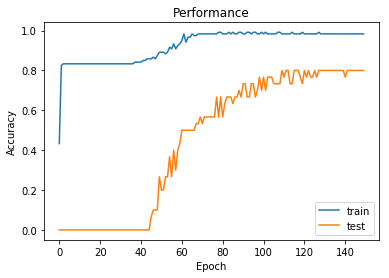

In [23]:
plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='test')

plt.title('Performance')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc=4)
plt.show()

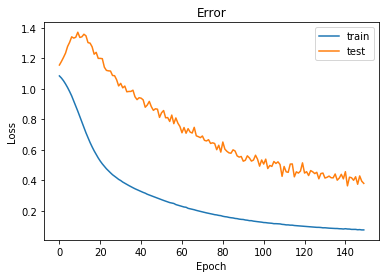

In [24]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')

plt.title('Error')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
f"final train: {hist.history['acc'][-1]:.1%}"

'final train: 98.3%'

In [26]:
f"final test: {hist.history['val_acc'][-1]:.1%}"

'final test: 80.0%'